<a href="https://colab.research.google.com/github/faturbg/data/blob/main/SURVEY%20LIVINGCOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# Menampilkan data untuk memeriksa formatnya
df.head()

,RESPONDEN,KOTA,UNIVERSITAS/INSTITUSI,RATA RATA BIAYA TINGGAL,RATA RATA BIAYA MAKAN,RATA RATA BIAYA TRANSPORT,PENUNJANG PERKULIAHAN,BIAYA KESEHATAN,HIBURAN,RATA RATA PENGHASILAN TAMBAHAN,TOTAL LIVINGCOST
0,1,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,725000,1300000,225000,475000,425000,750000,1500000,3900000
1,2,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,750000,475000,750000,425000,0,3480000
2,3,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,75000,437500,75000,225000,750000,1892500
3,4,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,975000,2080000,75000,437500,225000,750000,0,4542500
4,5,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,200000,780000,425000,412500,750000,425000,750000,2992500


In [ ]:
# Memeriksa data yang hilang
df.isnull().sum()

# Mengisi data yang hilang dengan nilai rata-rata kolom, hanya untuk kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns  # Seleksi kolom numerik
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
from sklearn.preprocessing import StandardScaler

# Menstandarisasi data
scaler = StandardScaler()
# Check the actual column names in your DataFrame using df.columns
print(df.columns)
# Adjust the features list to match the actual column names in your DataFrame and ONLY include numerical features
features = ['RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN','RATA RATA BIAYA TRANSPORT','PENUNJANG PERKULIAHAN','BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST']
df_scaled = scaler.fit_transform(df[features])

# Menampilkan data yang sudah diskalakan
df_scaled[:5]
# Melakukan clustering dengan K-Means sebelum mencoba mengakses kolom 'Cluster'
kmeans = KMeans(n_clusters=3, random_state=42) # Inisialisasi model KMeans
df['Cluster'] = kmeans.fit_predict(df_scaled) # Sesuaikan df_scaled dengan data yang sudah diskalakan

# Print the columns of your DataFrame to see the actual names
print(df.columns)

# Access the 'Kota' and 'Cluster' columns
df[['KOTA', 'TOTAL LIVINGCOST', 'Cluster']] # Sekarang kolom 'Cluster' sudah ada di DataFrame

Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST', 'Cluster',
       'Total Living Cost'],
      dtype='object')
Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'TOTAL LIVINGCOST', 'Cluster',
       'Total Living Cost'],
      dtype='object')


,KOTA,TOTAL LIVINGCOST,Cluster
0,BALIKPAPAN,3900000,1
1,BALIKPAPAN,3480000,1
2,BALIKPAPAN,1892500,0
3,BALIKPAPAN,4542500,1
4,BALIKPAPAN,2992500,1
...,...,...,...
755,YOGYAKARTA,1830000,2
756,YOGYAKARTA,2562500,0
757,YOGYAKARTA,1652500,2
758,YOGYAKARTA,3105000,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# ... (Kode untuk preprocessing data dan clustering sama seperti sebelumnya) ...

# Menstandarisasi data
features = ['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
           'RATA RATA PENGHASILAN TAMBAHAN']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Menghitung total biaya hidup (Total Living Cost)
df['Total Living Cost'] = df[['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN']].sum(axis=1)

# Membuat tabel cluster dengan Total Living Cost
cluster_table = df[['KOTA', 'Cluster', 'Total Living Cost']].sort_values(by=['Cluster', 'Total Living Cost'])

# Menentukan kategori cluster berdasarkan Total Living Cost dan mengubahnya menjadi 1, 2, 3
def cluster_category(total_cost):
    if total_cost <= 2000000:
        return 1  # Rendah
    elif total_cost <= 3000000:
        return 2  # Sedang
    else:
        return 3  # Tinggi

cluster_table['Kategori'] = cluster_table['Total Living Cost'].apply(cluster_category)

# Mengganti nilai cluster dengan nilai kategori (1, 2, 3)
cluster_table['Cluster'] = cluster_table['Kategori']
cluster_table = cluster_table.drop(columns=['Kategori']) # Menghapus kolom 'Kategori' jika tidak dibutuhkan

# Menampilkan tabel cluster
# Instead of df[['cluster_table']], display the cluster_table DataFrame directly
display(cluster_table)

,KOTA,Cluster,Total Living Cost
568,SEMARANG,2,2052500
159,BANJARMASIN,2,2090000
623,SEMARANG,2,2090000
32,BALIKPAPAN,2,2183750
54,BALIKPAPAN,2,2205000
...,...,...,...
758,YOGYAKARTA,3,3105000
471,SAMARINDA,3,3450000
110,BANDUNG,3,3855000
52,BALIKPAPAN,3,4042500


from matplotlib import pyplot as plt
cluster_table['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Total Living Cost'].plot(kind='hist', bins=20, title='Total Living Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table.plot(kind='scatter', x='Cluster', y='Total Living Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_table['Total Living Cost'].plot(kind='line', figsize=(8, 4), title='Total Living Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

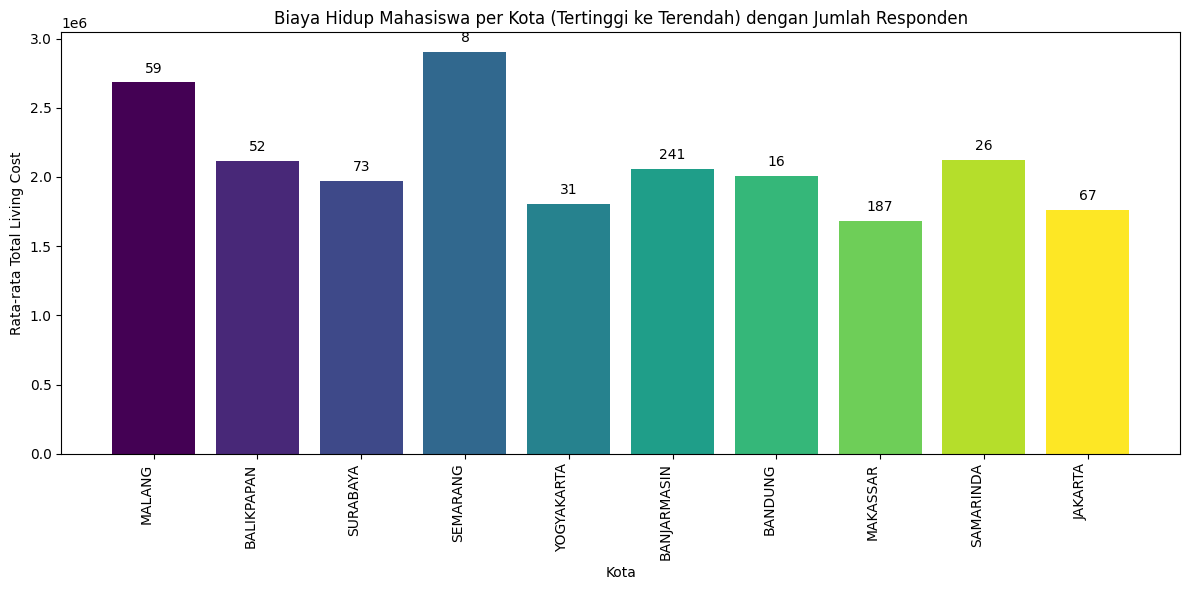

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'
df = pd.read_excel(file_path)

# Menghitung total biaya hidup (Total Living Cost)
df['Total Living Cost'] = df[['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN']].sum(axis=1)

# Mengurutkan data berdasarkan Total Living Cost (Descending)
df_sorted = df.sort_values(by=['Total Living Cost'], ascending=False)

# Menghitung jumlah responden per kota
responden_per_kota = df_sorted['KOTA'].value_counts().sort_index()

# Membuat warna dinamis berdasarkan Total Living Cost
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted['KOTA'].unique())))

# Membuat grafik bar
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_sorted['KOTA'].unique(), df_sorted.groupby('KOTA')['Total Living Cost'].mean(), color=colors)

# Menambahkan label jumlah responden di atas setiap bar
for bar, count in zip(bars, responden_per_kota):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50000, count, ha='center', va='bottom')


ax.set_xlabel('Kota')
ax.set_ylabel('Rata-rata Total Living Cost')
ax.set_title('Biaya Hidup Mahasiswa per Kota (Tertinggi ke Terendah) dengan Jumlah Responden')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-2-50337511c2c0>:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


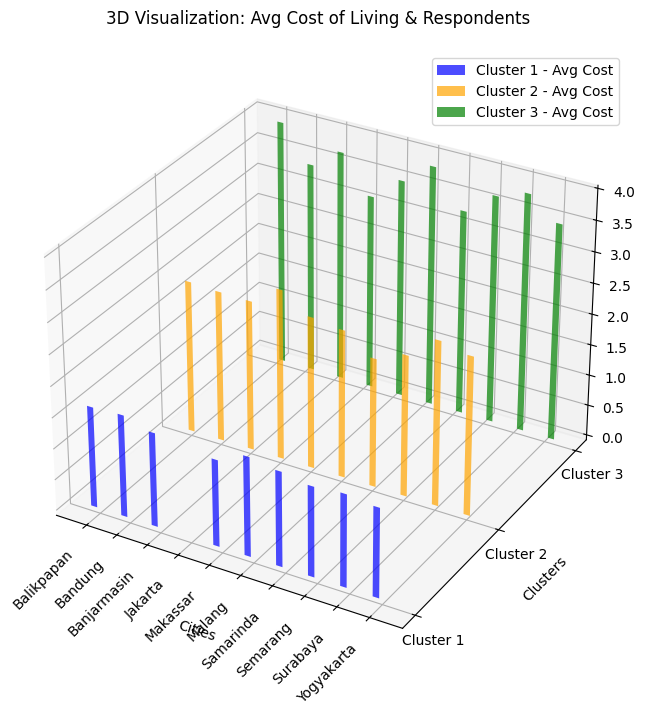

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
# Data for plotting
cities = [
    "Balikpapan", "Bandung", "Banjarmasin", "Jakarta", "Makassar",
    "Malang", "Samarinda", "Semarang", "Surabaya", "Yogyakarta"
]

# Rata-rata biaya hidup per cluster
avg_cost_cluster_1 = [1620227.27, 1643790.32, 1513722.22, None, 1393154.76, 1598577.90, 1524090.91, 1446250.00, 1486470.59, 1436275.00]
avg_cost_cluster_2 = [2461093.75, 2436730.77, 2428522.73, 2750000.00, 2450468.75, 2390225.90, 2080000.00, 2279375.00, 2656875.00, 2556607.14]
avg_cost_cluster_3 = [3964464.29, 3406562.50, 3733541.67, 3150000.00, 3531250.00, 3885312.50, 3307500.00, 3677343.75, 3845500.00, 3501666.67]

# Replace None values with 0 for plotting
avg_cost_cluster_1 = [cost if cost is not None else 0 for cost in avg_cost_cluster_1]

# Jumlah responden per cluster
respondents_cluster_1 = [22, 31, 45, None, 21, 138, 11, 147, 17, 50]
respondents_cluster_2 = [32, 26, 44, 10, 16, 166, 2, 64, 8, 28]
respondents_cluster_3 = [63, 24, 18, 9, 6, 60, 12, 24, 15, 9]

# X-axis for cities
x = np.arange(len(cities))

# Creating the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Bar chart for average living cost
bar_width = 0.2
ax.bar(x - bar_width, avg_cost_cluster_1, zs=0, zdir='y', width=bar_width, color='blue', alpha=0.7, label='Cluster 1 - Avg Cost')
ax.bar(x, avg_cost_cluster_2, zs=1, zdir='y', width=bar_width, color='orange', alpha=0.7, label='Cluster 2 - Avg Cost')
ax.bar(x + bar_width, avg_cost_cluster_3, zs=2, zdir='y', width=bar_width, color='green', alpha=0.7, label='Cluster 3 - Avg Cost')

# Line chart for respondents
for i, city in enumerate(cities):
    if respondents_cluster_1[i] is not None:
        ax.plot([i, i], [0, 0], [0, respondents_cluster_1[i]], color='blue', linestyle='--', alpha=0.8)
    if respondents_cluster_2[i] is not None:
        ax.plot([i, i], [1, 1], [0, respondents_cluster_2[i]], color='orange', linestyle='--', alpha=0.8)
    if respondents_cluster_3[i] is not None:
        ax.plot([i, i], [2, 2], [0, respondents_cluster_3[i]], color='green', linestyle='--', alpha=0.8)

# Setting labels and titles
ax.set_xlabel('Cities', labelpad=10)
ax.set_ylabel('Clusters', labelpad=10)
ax.set_zlabel('Average Living Cost (IDR)', labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_title('3D Visualization: Avg Cost of Living & Respondents', pad=20)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


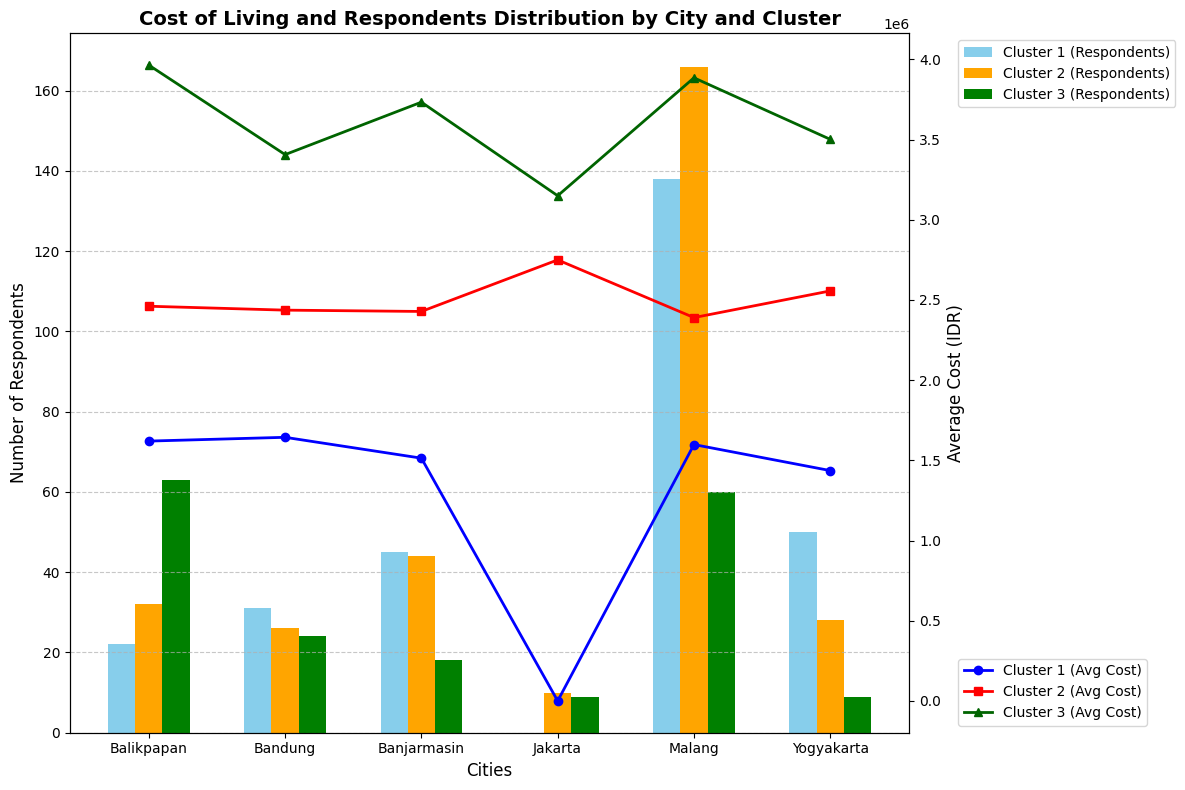

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
cities = ['Balikpapan', 'Bandung', 'Banjarmasin', 'Jakarta', 'Malang', 'Yogyakarta']
cluster1_costs = [1620227.27, 1643790.32, 1513722.22, 0, 1598577.90, 1436275.00]
cluster2_costs = [2461093.75, 2436730.77, 2428522.73, 2750000.00, 2390225.90, 2556607.14]
cluster3_costs = [3964464.29, 3406562.50, 3733541.67, 3150000.00, 3885312.50, 3501666.67]
cluster1_respondents = [22, 31, 45, 0, 138, 50]
cluster2_respondents = [32, 26, 44, 10, 166, 28]
cluster3_respondents = [63, 24, 18, 9, 60, 9]

# Bar chart positions
x = np.arange(len(cities))
width = 0.2

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar charts for respondents
ax1.bar(x - width, cluster1_respondents, width, label='Cluster 1 (Respondents)', color='skyblue')
ax1.bar(x, cluster2_respondents, width, label='Cluster 2 (Respondents)', color='orange')
ax1.bar(x + width, cluster3_respondents, width, label='Cluster 3 (Respondents)', color='green')

# Line chart for costs
ax2 = ax1.twinx()
ax2.plot(x, cluster1_costs, label='Cluster 1 (Avg Cost)', color='blue', marker='o', linewidth=2)
ax2.plot(x, cluster2_costs, label='Cluster 2 (Avg Cost)', color='red', marker='s', linewidth=2)
ax2.plot(x, cluster3_costs, label='Cluster 3 (Avg Cost)', color='darkgreen', marker='^', linewidth=2)

# Formatting
ax1.set_xlabel('Cities', fontsize=12)
ax1.set_ylabel('Number of Respondents', fontsize=12, color='black')
ax2.set_ylabel('Average Cost (IDR)', fontsize=12, color='black')
ax1.set_title('Cost of Living and Respondents Distribution by City and Cluster', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(cities, fontsize=10)
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0), fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


<ipython-input-1-0a81b431b162>:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


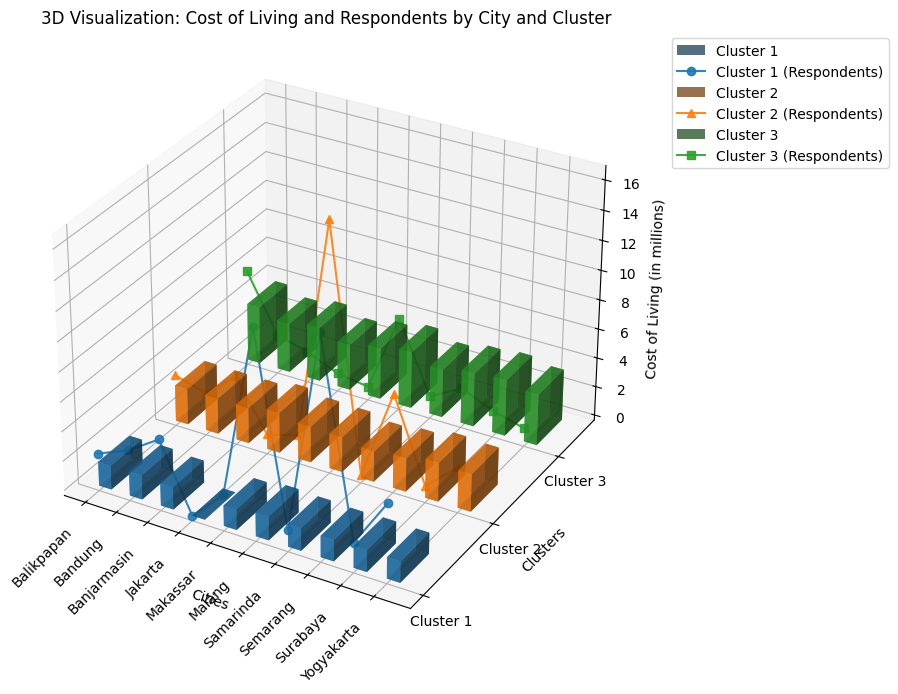

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
cities = ['Balikpapan', 'Bandung', 'Banjarmasin', 'Jakarta', 'Makassar',
          'Malang', 'Samarinda', 'Semarang', 'Surabaya', 'Yogyakarta']
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']

avg_cost = [
    [1620227.27, 2461093.75, 3964464.29],  # Balikpapan
    [1643790.32, 2436730.77, 3406562.50],  # Bandung
    [1513722.22, 2428522.73, 3733541.67],  # Banjarmasin
    [0, 2750000.00, 3150000.00],           # Jakarta
    [1393154.76, 2450468.75, 3531250.00],  # Makassar
    [1598577.90, 2390225.90, 3885312.50],  # Malang
    [1524090.91, 2080000.00, 3307500.00],  # Samarinda
    [1446250.00, 2279375.00, 3677343.75],  # Semarang
    [1486470.59, 2656875.00, 3845500.00],  # Surabaya
    [1436275.00, 2556607.14, 3501666.67],  # Yogyakarta
]

respondents = [
    [22, 32, 63],  # Balikpapan
    [31, 26, 24],  # Bandung
    [45, 44, 18],  # Banjarmasin
    [0, 10, 9],    # Jakarta
    [21, 16, 6],   # Makassar
    [138, 166, 60],  # Malang
    [11, 2, 12],   # Samarinda
    [147, 64, 24], # Semarang
    [17, 8, 15],   # Surabaya
    [50, 28, 9],   # Yogyakarta
]

# Convert to numpy array for easier manipulation
avg_cost = np.array(avg_cost)
respondents = np.array(respondents)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting bars and lines for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', '^', 's']

for i, cluster in enumerate(clusters):
    xpos = np.arange(len(cities))
    ypos = np.full(len(cities), i)  # Position by cluster
    zpos = np.zeros(len(cities))   # Base of bars

    dx = 0.4
    dy = 0.4
    dz = avg_cost[:, i] / 1e6  # Scale down for visualization

    # Bar chart for average cost
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors[i], alpha=0.7, label=cluster)

    # Line chart for respondents
    ax.plot(xpos, [i]*len(cities), respondents[:, i] / 10, color=colors[i],
            marker=markers[i], label=f'{cluster} (Respondents)', alpha=0.9)

# Labels and titles
ax.set_xticks(np.arange(len(cities)))
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_yticks(range(len(clusters)))
ax.set_yticklabels(clusters)
ax.set_zlabel('Cost of Living (in millions)')
ax.set_xlabel('Cities')
ax.set_ylabel('Clusters')
ax.set_title('3D Visualization: Cost of Living and Respondents by City and Cluster')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


<ipython-input-2-cef4c9fcb2a2>:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


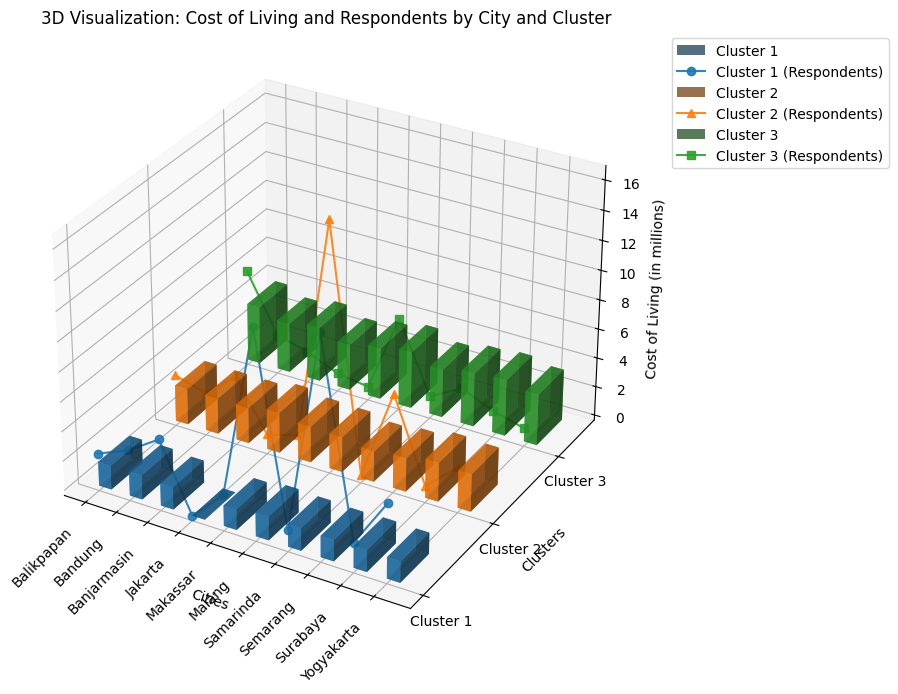

In [ ]:
# Reimport necessary libraries and reinitialize data after environment reset
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
cities = ['Balikpapan', 'Bandung', 'Banjarmasin', 'Jakarta', 'Makassar',
          'Malang', 'Samarinda', 'Semarang', 'Surabaya', 'Yogyakarta']
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']

avg_cost = [
    [1620227.27, 2461093.75, 3964464.29],  # Balikpapan
    [1643790.32, 2436730.77, 3406562.50],  # Bandung
    [1513722.22, 2428522.73, 3733541.67],  # Banjarmasin
    [0, 2750000.00, 3150000.00],           # Jakarta
    [1393154.76, 2450468.75, 3531250.00],  # Makassar
    [1598577.90, 2390225.90, 3885312.50],  # Malang
    [1524090.91, 2080000.00, 3307500.00],  # Samarinda
    [1446250.00, 2279375.00, 3677343.75],  # Semarang
    [1486470.59, 2656875.00, 3845500.00],  # Surabaya
    [1436275.00, 2556607.14, 3501666.67],  # Yogyakarta
]

respondents = [
    [22, 32, 63],  # Balikpapan
    [31, 26, 24],  # Bandung
    [45, 44, 18],  # Banjarmasin
    [0, 10, 9],    # Jakarta
    [21, 16, 6],   # Makassar
    [138, 166, 60],  # Malang
    [11, 2, 12],   # Samarinda
    [147, 64, 24], # Semarang
    [17, 8, 15],   # Surabaya
    [50, 28, 9],   # Yogyakarta
]

# Convert to numpy array for easier manipulation
avg_cost = np.array(avg_cost)
respondents = np.array(respondents)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting bars and lines for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', '^', 's']

for i, cluster in enumerate(clusters):
    xpos = np.arange(len(cities))
    ypos = np.full(len(cities), i)  # Position by cluster
    zpos = np.zeros(len(cities))   # Base of bars

    dx = 0.4
    dy = 0.4
    dz = avg_cost[:, i] / 1e6  # Scale down for visualization

    # Bar chart for average cost
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors[i], alpha=0.7, label=cluster)

    # Line chart for respondents
    ax.plot(xpos, [i]*len(cities), respondents[:, i] / 10, color=colors[i],
            marker=markers[i], label=f'{cluster} (Respondents)', alpha=0.9)

# Labels and titles
ax.set_xticks(np.arange(len(cities)))
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_yticks(range(len(clusters)))
ax.set_yticklabels(clusters)
ax.set_zlabel('Cost of Living (in millions)')
ax.set_xlabel('Cities')
ax.set_ylabel('Clusters')
ax.set_title('3D Visualization: Cost of Living and Respondents by City and Cluster')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()
